In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\nandh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data=pd.read_csv('train_XnW6LSF.csv')


In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

IMPUTE MISSING VALUES

In [7]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

In [8]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [9]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

CONVERT CATEGORIES TO NUMBERS

In [10]:
train_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [16]:
train_data['Outlet_Size']=train_data['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [17]:
train_data['Outlet_Location_Type']=train_data['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [18]:
train_data['Outlet_Type']=train_data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2,'Supermarket Type1':1})

In [19]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].map({'low fat':0,'Low Fat':0,'LF':0,'Regular':1,'reg':1})

In [20]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,1,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,1,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,3,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,3,1,994.7052


In [21]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [22]:
train_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder=LabelEncoder()

In [25]:
train_data['Item_Identifier']=encoder.fit_transform(train_data['Item_Identifier'])
train_data['Item_Type']=encoder.fit_transform(train_data['Item_Type'])
train_data['Outlet_Identifier']=encoder.fit_transform(train_data['Outlet_Identifier'])




In [26]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,1,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,3,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,1,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,3,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,2,3,1,994.7052


In [27]:
X_train=train_data.drop('Item_Outlet_Sales',axis=1)
y_train=train_data['Item_Outlet_Sales']


SCALING:

In [28]:
for i in X_train.columns[:]:
    X_train[i]=(X_train[i]-X_train[i].min())/(X_train[i].max()-X_train[i].min())

In [29]:
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.048866,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.058705,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.051037,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.000000,0.600000,0.095805,0.111111,0.083333,1.0,1.0,0.333333


In [30]:
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Dense



In [31]:
input_neurons = X_train.shape[1]

In [32]:
output_neurons = 1

In [33]:
number_of_hidden_layers=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5
neuron_hidden_layer_3=3

In [34]:
model=Sequential()

In [35]:
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3,activation='relu'))
model.add(Dense(units=output_neurons,activation='linear'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [37]:

model.compile(loss='mean_absolute_error',optimizer='rmsprop')

In [38]:
history=model.fit(X_train,y_train,epochs=30,batch_size=50,validation_split=0.2)

Epoch 1/30
137/137 [==============================] - 2s 6ms/step - loss: 2182.6890 - val_loss: 2161.7371
Epoch 2/30
137/137 [==============================] - 0s 3ms/step - loss: 2173.5876 - val_loss: 2147.2666
Epoch 3/30
137/137 [==============================] - 0s 4ms/step - loss: 2150.5369 - val_loss: 2113.8252
Epoch 4/30
137/137 [==============================] - 0s 3ms/step - loss: 2102.9053 - val_loss: 2050.5571
Epoch 5/30
137/137 [==============================] - 0s 3ms/step - loss: 2020.3383 - val_loss: 1948.4990
Epoch 6/30
137/137 [==============================] - 0s 3ms/step - loss: 1896.7808 - val_loss: 1804.6831
Epoch 7/30
137/137 [==============================] - 0s 3ms/step - loss: 1731.9147 - val_loss: 1627.2589
Epoch 8/30
137/137 [==============================] - 1s 4ms/step - loss: 1541.3448 - val_loss: 1445.8362
Epoch 9/30
137/137 [==============================] - 1s 4ms/step - loss: 1368.9520 - val_loss: 1301.6924
Epoch 10/30
137/137 [=========================

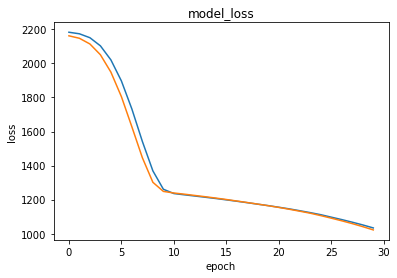

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()
    


In [40]:
test_data=pd.read_csv('test_FewQE9B.csv')

In [41]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [44]:
test_data['Outlet_Size']=test_data['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
test_data['Outlet_Location_Type']=test_data['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
test_data['Outlet_Type']=test_data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2,'Supermarket Type1':1})
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].map({'low fat':0,'Low Fat':0,'LF':0,'Regular':1,'reg':1})

In [45]:
encoder1=LabelEncoder()
test_data['Item_Identifier']=encoder1.fit_transform(test_data['Item_Identifier'])
test_data['Item_Type']=encoder1.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier']=encoder1.fit_transform(test_data['Outlet_Identifier'])

In [46]:
test_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,1,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,2,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,3,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,2,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,3,3


In [47]:
for i in test_data.columns[:]:
    test_data[i]=(test_data[i]-test_data[i].min())/(test_data[i].max()-test_data[i].min())


In [48]:
test_data['prediction']=model.predict(test_data)

178/178 [==============================] - 1s 2ms/step


In [49]:
test_data['prediction']

0       1975.517700
1       1457.098267
2       1847.643555
3       1836.542358
4       3243.464355
           ...     
5676    1946.960571
5677    2423.518311
5678    1899.540039
5679    2253.408936
5680    1665.620239
Name: prediction, Length: 5681, dtype: float32

In [50]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,prediction
0,0.715305,0.964275,0.0,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333,1975.517700
1,0.691958,0.222983,1.0,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333,1457.098267
2,0.911803,0.598095,0.0,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000,1847.643555
3,0.524643,0.164335,0.0,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333,1836.542358
4,0.767834,0.484706,1.0,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000,3243.464355


In [52]:
data=pd.read_csv("test_FewQE9B.csv")
data["Item_Outlet_Sales"]=test_data.prediction
header=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]
data.to_csv("output.csv",columns=header,index=False)




